# Notebook introduction

This week we will focus on the study of networks. In this notebook you will start with an introduction to NetworkX.

[NetworkX](https://networkx.github.io/)  is a Python language software package used to create, manipulate, and study the structure, dynamics, and function of complex networks. The first version was designed and written by Aric Hagberg, Dan Schult, and Pieter Swart between 2002 and 2003.

With NetworkX you can load and store networks in standard and nonstandard data formats; generate numerous types of random and classic networks; analyze network structure; build network models; design new network algorithms; draw networks; and much more.

To access and use NetworkX module functionality, it first needs to be imported into your Jupyter notebook workspace. In addition to this, you will also import Matplotlib - a plotting and data visualization module that will be used for the graphical representation of the graph objects created using NetworkX.

Here are some additional links that will provide you with solid foundational knowledge of NetworkX:

- [NetworkX documentation](http://networkx.readthedocs.io/en/networkx-1.11/)
- [NetworkX quick example](https://networkx.github.io/examples.html)
- [NetworkX examples](http://networkx.readthedocs.io/en/networkx-1.11/examples/)
- [NetworkX tutorial](http://networkx.readthedocs.io/en/networkx-1.11/tutorial/)


# 1. Graph creation
With NetworkX, graph objects can be created in one of three ways:

1. Adding edges and nodes explicitly;

2. Importing data from data sources; and

3. Graph generators.

This notebook predominantly investigates graph exploration using the first approach, with a few remarks made on the other graph creation approaches.

## 1.1 Adding edges and nodes explicitly
First, create a graph object by explicitly adding nodes to said object.

In [ ]:
# install necessary packages
!pip install networkx
!pip install oauth2  #advanced examples

In [104]:
import networkx as nx
import matplotlib.pyplot as plt

# Instantiate an empty, undirected graph object.
g = nx.Graph()

# add a single node
g.add_node(1)

# use .add_nodes_from() to add in bulk of nodes
g.add_nodes_from([2,3,'four',5])

# view de graph
g.nodes()  

[1, 2, 3, 'four', 5]

In [105]:
# What happens if the same node is added to the graph?
g.add_node(1)

print("Nodes: ", g.nodes(), "\nNumber of nodes: ", g.number_of_nodes())

Nodes:  [1, 2, 3, 'four', 5] 
Number of nodes:  5


A node can be any of the so-called **hashable** objects - strings, numbers, files, functions, etc.  In the following two examples, a node that is a math function and a node that is a file object are added.

In [106]:
# Add a sine function as node, which is imported from the math module.
from math import sin
g.add_node(sin) 

In [107]:
import urllib
url = 'http://dados.ufrn.br/api/action/datastore_search?resource_id=6b0f85b4-9df2-4f06-9e44-9c4bf260a3ea&limit=5&q=title:jones'
fileobj = urllib.request.urlopen(url)

# Add a http response object to graph
g.add_node(fileobj)

### 1.1.1 Visualize the graph structure.

In [108]:
# Plot the graph structure.
plt.axis('off')

#documentation about .draw_networkx
#http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx

nx.draw_networkx(g,pos=nx.spring_layout(g), with_labels=True, node_size=1000)

#pos = circular_layout,random_layout,shell_layout,
#spring_layout,spectral_layout,fruchterman_reingold_layout' 

plt.show() 
    

### 1.1.2 Adding & editing edges

Alternatively, you can start off from an edge pair or a list of edge pairs. Such a pairing may or may not include the strength, or other attributes, that describes the relationship between the pair(s). The special edge attribute "weight" should always be numeric and holds values used by algorithms requiring weighted edges. When specifying edges as tuples, the optional third argument refers to the weight.

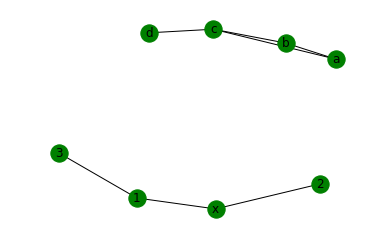

In [111]:
# Instantiate an empty, undirected graph object.
G = nx.Graph()

# Demonstrate a second method of creating a graph.
G.add_edge(1,3)

# Add another edge with a weight.
G.add_edge(2,'x',weight=0.9) # other way G.add_edge('2', 'x', { 'distance': 0.4})
G.add_edge(1,'x',weight=3.142)

# Add edges from a list of tuples.
edgelist=[('a','b',5.0),('b','c',3.0),('a','c',1.0),('c','d',7.3)] 
G.add_weighted_edges_from(edgelist)

# Visualize the graph structure.
nx.draw_networkx(G, with_labels=True, node_color='green')

# Plot the graph structure.
plt.axis('off')
plt.show()

In [ ]:
# List of edges
print(G.edges())

# Alternative syntax for edges.
print(G.number_of_edges())

### 1.1.3 Getting edge weight information
The most direct way to get edge weight data is using the "get_edge_data" method, which returns the attribute dictionary associated with an edge pairing. The following example uses a python "trick" called unpacking, in which an edge pairing tuple is used as the argument to the function call, prefixed with a '*' symbol.

In [ ]:
G.get_edge_data(*G.edges()[1])

In [ ]:
# Print the weight information for all of the edges in your graph object.
for n1,n2,attr in G.edges(data=True): # Unpacking.
         print(n1,n2,attr)

### 1.1.4 Visualizing using Matrix plots

It is time to try a "fancy" graph visualization method: a matrix plot. To do this, **nxviz** provides a **MatrixPlot** object.

**nxviz** is a package for visualizing graphs in a rational fashion. Under the hood, the MatrixPlot utilizes **nx.to_numpy_matrix(G)**, which returns the matrix form of the graph. Here, each node is one column and one row, and an edge between the two nodes is indicated by the value 1. In doing so, however, only the weight metadata is preserved; all other metadata is lost, as you'll verify using an assert statement.

**nxviz's author**: https://github.com/ericmjl/nxviz

In [ ]:
# install nxviz
!pip install nxviz

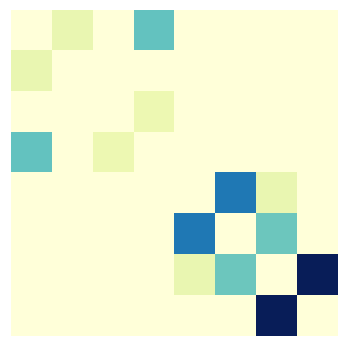

[[ 0.     1.     0.     3.142  0.     0.     0.     0.   ]
 [ 1.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.9    0.     0.     0.     0.   ]
 [ 3.142  0.     0.9    0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     5.     1.     0.   ]
 [ 0.     0.     0.     0.     5.     0.     3.     0.   ]
 [ 0.     0.     0.     0.     1.     3.     0.     7.3  ]
 [ 0.     0.     0.     0.     0.     0.     7.3    0.   ]]


In [112]:
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(G)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# Convert G to a matrix format: A
A = nx.to_numpy_matrix(G)

print(A)

### 1.1.5 Visualizing using Circos plots

Circos plots are a rational, non-cluttered way of visualizing graph data, in which nodes are ordered around the circumference in some fashion, and the edges are drawn within the circle that results, giving a beautiful as well as informative visualization about the structure of the network.

> This visualization helps us highlight nodes that there are poorly connected, and others that are strongly connected.


#### Create a new network (for the sake of understanding)

In [113]:
# Instantiate an empty, undirected graph object.
G = nx.Graph()

nodes = [(1, {'category': 'A', 'occupation': 'scientist'}),
         (2, {'category': 'F', 'occupation': 'scientist'}),
         (3, {'category': 'C', 'occupation': 'politician'}),
         (4, {'category': 'R', 'occupation': 'celebrity'}),
         (5, {'category': 'C', 'occupation': 'politician'}),
         (6, {'category': 'P', 'occupation': 'celebrity'}),
         (7, {'category': 'P', 'occupation': 'celebrity'}),
         (8, {'category': 'D', 'occupation': 'scientist'})
        ]
G.add_nodes_from(nodes)

In [114]:
# Visualize the nodes
G.nodes(data=True)

[(1, {'category': 'A', 'occupation': 'scientist'}),
 (2, {'category': 'F', 'occupation': 'scientist'}),
 (3, {'category': 'C', 'occupation': 'politician'}),
 (4, {'category': 'R', 'occupation': 'celebrity'}),
 (5, {'category': 'C', 'occupation': 'politician'}),
 (6, {'category': 'P', 'occupation': 'celebrity'}),
 (7, {'category': 'P', 'occupation': 'celebrity'}),
 (8, {'category': 'D', 'occupation': 'scientist'})]

In [115]:
# Adding edges
G.add_edge(1,2,weight=1)
G.add_edge(1,8,weight=1)
G.add_edge(3,5,weight=1)
G.add_edge(4,6,weight=1)
G.add_edge(4,7,weight=1)

In [116]:
# Import necessary modules to use Circos plot
import matplotlib.pyplot as plt
from nxviz import CircosPlot 

# Create the CircosPlot object: c
c = CircosPlot(G,node_color='occupation', 
               node_grouping='occupation')

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

### 1.1.6 Visualizing using Arc plots

Following on what you've learned about the nxviz API, now try making an ArcPlot of the network. 

In [117]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the customized ArcPlot object: a
a = ArcPlot(G,node_order='occupation',node_color='occupation')

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

### 1.1.7 Getting neighbor information
It is also possible to get a list of the neighbors associated with a given node. In the following cell,  invoke the graph method "neighbors" and specify the node whose neighbors you are interested in.

In [118]:
for node in G.nodes():
         print(node, G.neighbors(node))

1 [2, 8]
2 [1]
3 [5]
4 [6, 7]
5 [3]
6 [4]
7 [4]
8 [1]


### 1.1.8 Removing nodes or edges 
Removing edges and nodes from a graph is very simple, and is illustrated in the cell below. 

In [ ]:
# Add a set of edges from a list of tuples.
e = [(8 ,2) ,(1 ,7)]
G.add_edges_from(e)

# Remove edge (8,2).
G.remove_edge(8,2)

# Visualize the graph structure.
nx.draw_networkx(G, with_labels=True)

# Plot the graph structure.
plt.axis('off')
plt.show()

In [ ]:
# Similarly, you can also remove a node.
G.remove_node('c')

# Visualize the graph structure.
nx.draw_networkx(G, with_labels=True)

# Plot the graph structure.
plt.axis('off')
plt.show()

In [ ]:
e = [('x' ,2) ,(1 ,7)]

# Multiple edge or node removal is also possible, e.g.
G.remove_edges_from(e)

# Visualize the graph structure.
nx.draw_networkx(G, with_labels=True)

# Plot the graph structure.
plt.axis('off')
plt.show()


## 1.2 Graph generators
NetworkX also has standard algorithms to create network topologies. The following cell includes some examples that you are encouraged to build, analyze, and visualize using the tools described above, as well as other tools that will be introduced later.

In [ ]:
# Small, famous graphs.
petersen=nx.petersen_graph()
tutte=nx.tutte_graph()
maze=nx.sedgewick_maze_graph()
tet=nx.tetrahedral_graph()

# Visualize the graph structure.
nx.draw_networkx(tet, with_labels=True)

# Plot the graph structure.
plt.axis('off')
plt.show()

In [ ]:
# Classic graphs.
K_5=nx.complete_graph(5)
K_3_5=nx.complete_bipartite_graph(3,5)
barbell=nx.barbell_graph(10,10)
lollipop=nx.lollipop_graph(10,20)

# Visualize the graph structure.
nx.draw_networkx(lollipop, with_labels=True)

# Plot the graph structure.
plt.axis('off')
plt.show()

In [ ]:
# Random graphs.
er=nx.erdos_renyi_graph(100,0.15)
ws=nx.watts_strogatz_graph(30,3,0.1)
ba=nx.barabasi_albert_graph(100,5)
red=nx.random_lobster(100,0.9,0.9)

# Visualize the graph structure.
nx.draw_networkx(red, with_labels=True)

# Plot the graph structure.
plt.axis('off')
plt.show()

## 1.3 Types of graphs

There are different types of graphs:

- Undirected graph (saw previously)
- Directed graph (DiGraph)
- Multi-edge (Directed) graph (MultiDigraph)


In [ ]:
# Creating a DiGraph
dg = nx.DiGraph()

# Add edges
dg.add_edges_from([(1,2), (2,3)])

# Print the edges
print('directed edges:', dg.edges())

# Draw the network
nx.draw_networkx(dg, node_color='green', with_labels=True)

# Configure plot
plt.axis('off')
plt.show()

In [ ]:
# Create a directed graph from G (section 1.1.5)
dg = nx.DiGraph(G)

# Draw the network
nx.draw_networkx(dg, node_color='blue', with_labels=True,
                pos=nx.spring_layout(G))

# Config plot
plt.axis('off')
plt.show()

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

> **Note**:

> This exercise contains six sections. It is broken up into these sections in order to make it easier to follow. 

### Instructions

> 1.1) How would you create the following graph?

<img src="http://nbviewer.jupyter.org/github/sarguido/networkx-tutorial/blob/master/materials/images/graph.png" style="float:left" width="200" />




### Instructions (continued)

> 1.2) Create an **_[ERDOS RENYI](http://networkx.github.io/documentation/networkx-1.7/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph)_** random graph.
Your graph should have 20 nodes, where each of the edges are chosen with a probability of 0.15 using NetworkX's graph generator methods. Assign your graph to a variable 'G'. Visualizing it using Circos and Arc Plot.

> The syntax should be: 

> ```G = nx.erdos_renyi_graph(nodes, probability, seed)```

In [ ]:
# First set the range for reproducibility of the results.
import random
s = random.seed(20)

In [ ]:
# Your answer here.

### Instructions (continued)
> 1.3) Compute the number of edges in the graph using one of the methods provided by NetworkX.

In [ ]:
# Your answer here.

### Instructions (continued)
> 1.4) Print the corresponding neighbors for each node.

In [ ]:
# Your answer here.

### Instructions (continued)
> 1.5) Find a node with the most number of neigbors. How many neighbors does it have?

> **Hint**: Review [NetworkX degree documentation](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.DiGraph.degree.html).

In [ ]:
# Your answer here.

### Instructions (continued)
> 1.6) Remove the node with the most neighbors (found in exercise 1.5 above) from the graph. Vizualize (Circos and Arc) the graph again to make sure the node was removed. 

In [ ]:
# Your answer here.